### AIRPORTS EDA

In this project we are going to load, clean and analyse the data corresponding to the airports and ports around the world.

First of all we are going to import the libraries necessary for the development of this project.

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from collections import Counter
import numpy as np

Loading the dataset directly from the URL.

For every airport registered this dataset includes the next information in form of columns.

-   AirportID: Identifier of each flight for an airport.
-   Name: Name of the airport.
-   City: City where the airport is located.
-   Country:: Country or territory in which the airport is located.
-   IATA: International Air Transport Association code, airport code.
-   ICAO: International civil organization code, airport code.
-   Latitude: Coordinate of the airport (latitude).
-   Longitude: Airport coordinate (longitude).
-   Altitude: Altitude of the airport (in feet).
-   Timezone: Time zone.
-   DST: Code referring to the continent (Daylight savings time). Europe (E), A (US/CANADA), S (South America), O (Australia), Z (New Zeeland), N (None), U (Unknown).
-   Tz: Airport time zone. For example: (America/Los_Angeles).
-   Type: Type of airport: airport, station, port, unknown.
-   Source: Data source.

In [179]:
#Reading the .csv from the specified URL without a header
flights = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat',header=None)
#Manually including the correct header for each column
new_header = ['Airport ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz','Type','Source']
flights.columns = new_header


Showing the first 10 rows of the dataframe to check everything is correct


In [180]:
flights.head(10)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport,OurAirports
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport,OurAirports
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


Summary of the numeric columns

In [181]:
flights.describe()

,Airport ID,Latitude,Longitude,Altitude
count,12668.000000,12668.000000,12668.000000,12668.000000
mean,7311.584465,29.820510,-1.041145,831.871093
std,4202.520098,26.923942,83.618663,1498.239733
min,1.000000,-90.000000,-179.876999,-1266.000000
25%,3349.750000,16.115875,-77.294770,38.000000
50%,7771.500000,38.341850,6.955411,232.500000
75%,10943.250000,49.306042,47.835824,883.500000
max,14111.000000,90.000000,179.951004,14472.000000


Visualization of the data

- The first set of plots consists of histograms for four numerical variables: 'Airport ID', 'Latitude', 'Longitude', and 'Altitude'. 
The histograms show the frequency of values within specified bins, and the smooth curves (KDE) provide a visual estimate of the data density.
- The second set of plots consists of violin plots for the same numerical variables: 'Airport ID', 'Latitude', 'Longitude', and 'Altitude'. Each violin plot provides information on the distribution of values, including quartiles, median, and KDE.

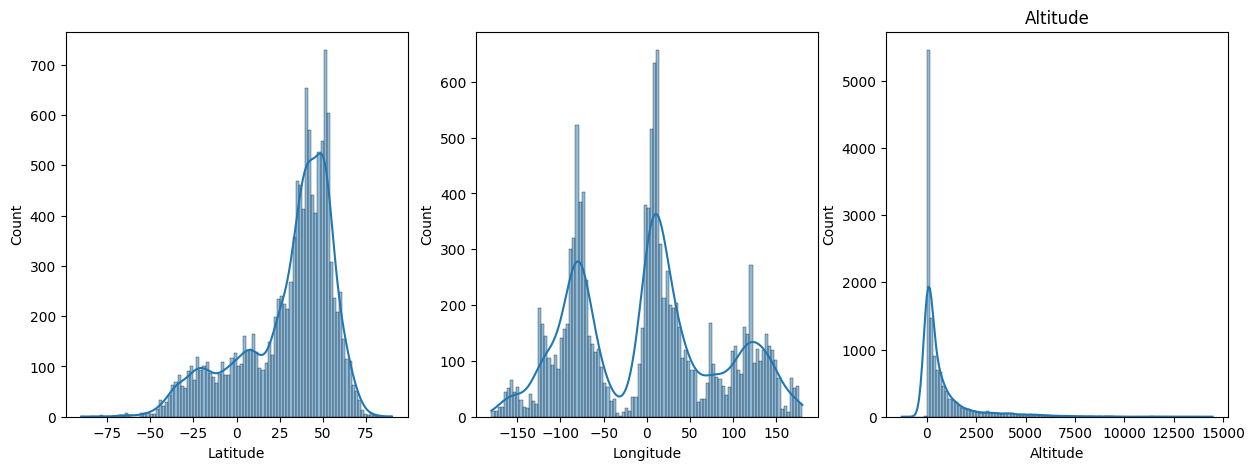

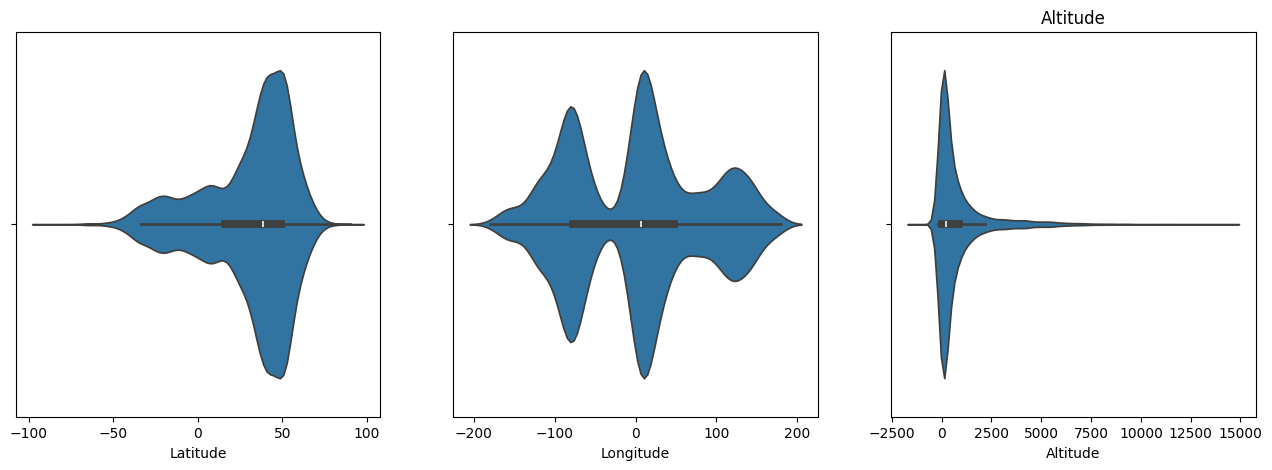

In [182]:
columns = [ 'Airport ID', 'Latitude', 'Longitude', 'Altitude']

#Plotting histograms in a 1x3 plot
fig, axes = plt.subplots(1, 3,figsize=(15,5))
sns.histplot(flights['Latitude'], bins=100, kde=True,ax=axes[0])
plt.title('Latitude')
sns.histplot(flights['Longitude'], bins=100, kde=True,ax=axes[1])
plt.title('Longitude')
sns.histplot(flights['Altitude'], bins=100, kde=True,ax=axes[2])
plt.title('Altitude')
plt.show()

#Plotting violinplots in a 1x3 plot
fig, axes = plt.subplots(1, 3,figsize=(16,5))
sns.violinplot(x=flights['Latitude'],ax=axes[0])
plt.title('Latitude')
sns.violinplot(x=flights['Longitude'],ax=axes[1])
plt.title('Longitude')
sns.violinplot(x=flights['Altitude'],ax=axes[2])
plt.title('Altitude')
plt.show()

Displaying a world map showing airport density.

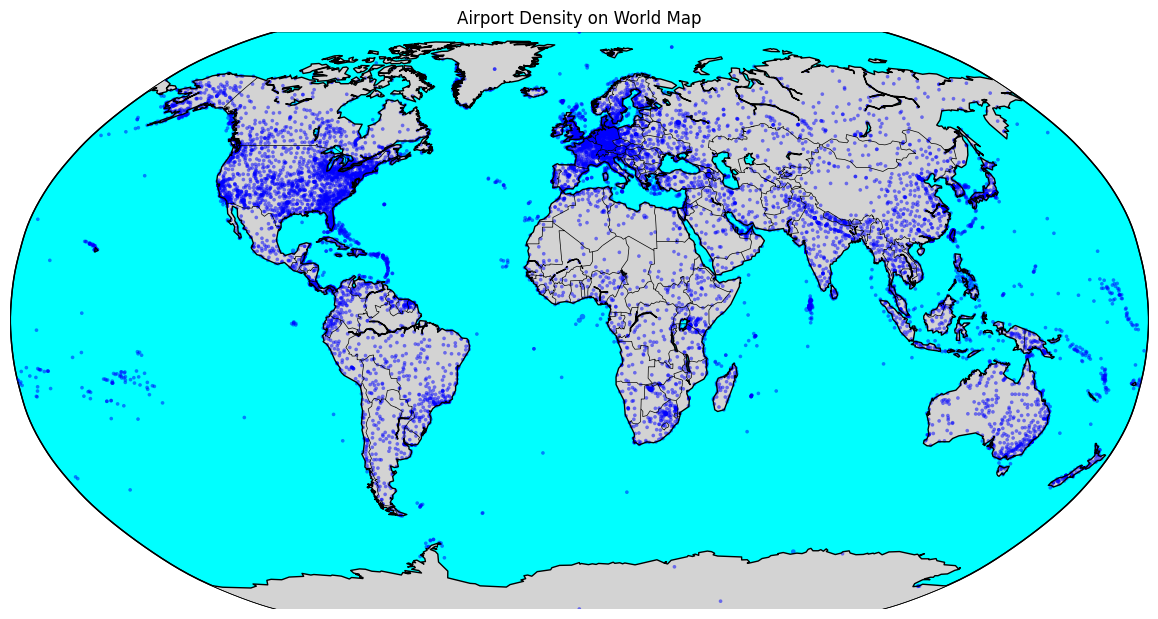

In [151]:
# Assuming 'flights' is your DataFrame and it contains 'Longitude' and 'Latitude' columns
longitudes = flights['Longitude']
latitudes = flights['Latitude']

# Count the frequency of each (lat, lon) pair
coords = list(zip(latitudes, longitudes))
frequency = Counter(coords)

# Separate out the frequencies and the coordinates
lat_lon_freq = np.array(list(frequency.values()))
latitudes, longitudes = np.array(list(frequency.keys())).T

# Create a new figure with a specified size
fig, ax = plt.subplots(figsize=(15, 7.5))

# Set up the Basemap instance
m = Basemap(projection='robin', lon_0=0, resolution='c')

# Draw coastlines, countries, and map boundaries
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Convert the longitude and latitude values to x and y coordinates to display on the map
x, y = m(longitudes, latitudes)

# The size will be proportional to the log of the frequency to reduce the range
sizes = np.log(lat_lon_freq + 1) * 10  # The 10 is an arbitrary scale factor for visibility

# Scatter plot for density
m.scatter(x, y, c='blue', s=sizes, alpha=0.5, edgecolors='none')

# Title and other plot settings
plt.title('Airport Density on World Map')
plt.show()


The 'Airport ID', 'Latitude', 'Longitude' and 'Altitude' columns are no longer needed, so we are going to remove them from the dataframe.

In [152]:
flights.drop([ 'Airport ID', 'Latitude', 'Longitude', 'Altitude'],inplace=True,axis=1)
flights

,Name,City,Country,IATA,ICAO,Timezone,DST,Tz,Type,Source
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...
12663,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,\N,\N,\N,airport,OurAirports
12664,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,\N,\N,\N,airport,OurAirports
12665,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,\N,\N,\N,airport,OurAirports
12666,Melitopol Air Base,Melitopol,Ukraine,\N,UKDM,\N,\N,\N,airport,OurAirports


If we get a statistical summary again, we can see that as there aren't numerical columns anymore the attributes displayed in the summary changed.

In [153]:
flights.describe()

,Name,City,Country,IATA,ICAO,Timezone,DST,Tz,Type,Source
count,12668,12619,12668,12668,12667,12668,12668,12668,12668,12668
unique,12330,9673,241,6925,8161,42,8,312,5,4
top,North Sea,New York,United States,\N,\N,1,E,\N,airport,OurAirports
freq,21,50,2708,5744,4507,2706,3478,4282,8264,7698


Determining the proportion of '\N' values in 'Tz' column using the value_counts method.

In [154]:
(flights.Tz.value_counts() / len(flights.Tz)) * 100

Tz
\N                    33.801705
America/New_York       5.565204
America/Chicago        3.173350
Europe/Berlin          2.549732
America/Anchorage      2.091885
                        ...    
Europe/Kaliningrad     0.007894
Africa/Bujumbura       0.007894
Africa/Banjul          0.007894
Indian/Mayotte         0.007894
Europe/Andorra         0.007894
Name: count, Length: 312, dtype: float64

With a summatory of nulls we can see that there very few of them as we have a lot of '\N' values that should be null.

In [155]:
flights.isna().sum()

Name         0
City        49
Country      0
IATA         0
ICAO         1
Timezone     0
DST          0
Tz           0
Type         0
Source       0
dtype: int64

Reloading the dataset and changind '\N' values to nulls.

Also, droping again the columns we are not interested in.

In [156]:
#Reading the .csv from the specified URL without a header
flights = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat',header=None,na_values=r'\N')
#Manually including the correct header for each column
new_header = ['Airport ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz','Type','Source']
flights.columns = new_header
flights.drop([ 'Airport ID', 'Latitude', 'Longitude', 'Altitude'],inplace=True,axis=1)

Checking the entire dataframe again for null values. We can see now that a lot of Null values appeared.

In [157]:
flights.isna().sum()

Name           0
City          49
Country        0
IATA        5744
ICAO        4508
Timezone     353
DST          353
Tz          4282
Type        1651
Source      1651
dtype: int64

Overwriting the null values of the IATA and ICAO columns with the string 'UNKNOWN'.

In [158]:
flights[['IATA','ICAO']] = flights[['IATA','ICAO']].fillna(value='UNKNOWN')
flights.isna().sum()

Name           0
City          49
Country        0
IATA           0
ICAO           0
Timezone     353
DST          353
Tz          4282
Type        1651
Source      1651
dtype: int64

Changing the type of the DST and TZ variables to categorical.

In [159]:
flights[['DST','Tz']] = flights[['DST','Tz']].astype('category')
flights

,Name,City,Country,IATA,ICAO,Timezone,DST,Tz,Type,Source
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...
12663,Ulan-Ude East Airport,Ulan Ude,Russia,UNKNOWN,XIUW,NaN,NaN,NaN,airport,OurAirports
12664,Krechevitsy Air Base,Novgorod,Russia,UNKNOWN,ULLK,NaN,NaN,NaN,airport,OurAirports
12665,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,NaN,NaN,NaN,airport,OurAirports
12666,Melitopol Air Base,Melitopol,Ukraine,UNKNOWN,UKDM,NaN,NaN,NaN,airport,OurAirports


Statistical summary of the categorical variables 'DST and 'Tz'.

In [160]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12668 entries, 0 to 12667
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      12668 non-null  object  
 1   City      12619 non-null  object  
 2   Country   12668 non-null  object  
 3   IATA      12668 non-null  object  
 4   ICAO      12668 non-null  object  
 5   Timezone  12315 non-null  float64 
 6   DST       12315 non-null  category
 7   Tz        8386 non-null   category
 8   Type      11017 non-null  object  
 9   Source    11017 non-null  object  
dtypes: category(2), float64(1), object(7)
memory usage: 839.9+ KB


In [161]:
flights.describe(include='category')

,DST,Tz
count,12315,8386
unique,7,311
top,E,America/New_York
freq,3478,705


Group the data by airport type, and plotting for better comprehension.

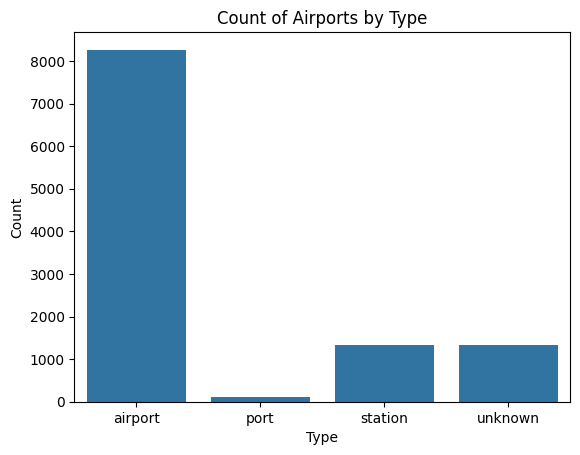

In [162]:
#Use groupby to count the occurrences of each type and reset the index and create the bar plot
sns.barplot(data=flights.groupby(['Type']).count().reset_index(),x='Type', y='Name')
#Plot title and axis label
plt.title('Count of Airports by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Selecting the names of cities where the airport type is "port," ensuring no repeated entries with unique() method.

In [163]:
ports = flights.loc[flights['Type'] == 'port', 'City'].unique()
print(f'There are {len(ports)} known ports in the dataframe, which are: \n\n{ports}')


There are 90 known ports in the dataframe, which are: 

['Macau' 'Stockholm' 'Helsingborg' 'Helsinki' 'Sakaiminato' 'Hong Kong'
 'Calais' 'Dover' 'Cape May NJ' 'Lewes DE' 'Bar Harbor ME' 'Yarmouth NS'
 'St. Ignace MI' 'Shenzhen' 'Zhuhai' 'Miyajima' 'Brown Bluff'
 'Devil Island' 'Gourdin Island' 'Cuverville Island' 'Labadee' 'Whittier'
 'Nuernberg' 'Costa maya' 'Rodby' 'Stranraer' 'Dieppe' 'Newhaven'
 'Falmouth' 'Cozumel' 'Philipsburg' 'Basseterre' 'Charlotte Amalie'
 'San Juan' 'Mormugao' 'Cochin' 'Salem' 'Severobajkalsk' 'Kendall'
 "St. George's" 'Cruz Bay' 'Red Hook' 'Anacortes' 'Friday Harbor' 'Valdez'
 'Bainbridge Island' 'Algerciras' 'Milan' 'Port Jefferson' 'Bridgeport'
 'Turin' 'Stykkisholmur' 'Kotor' 'Key West' 'Tau' 'Stavanger' 'Halhjem'
 'Sandviksvag' 'Arsvagen' 'Mortavika' 'Verona' 'Cheboygan'
 'Bois Blanc Island' 'St Ignace ' 'Toulon' 'Harpers Ferry' 'Auckland'
 'Bridgetown' 'Orient' 'Holyhead' 'Singapore' 'Batam' 'Kowloon'
 'Horseshoe Bay' 'Prince Rupert' 'Port Hardy' 'Nan

Showing  name of the airport, name of the country, and name of the city for airports located in Spain.

In [164]:
flights.loc[flights['Country'] == 'Spain',['Name','Country','City']]


,Name,Country,City
1030,Fuerteventura Airport,Spain,Fuerteventura
1031,Hierro Airport,Spain,Hierro
1032,La Palma Airport,Spain,Santa Cruz De La Palma
1033,Gran Canaria Airport,Spain,Gran Canaria
1034,Lanzarote Airport,Spain,Arrecife
...,...,...,...
11437,Madrid Estacion Sur,Spain,Madrid
11438,Granada Bus Station,Spain,Granada
11879,Palma de Mallorca Cruise Terminal,Spain,Palma de Mallorca
12234,Algeciras Heliport,Spain,Algeciras


Showing the names of the countries and airports belonging to the cities of Madrid and Barcelona.

As we can see, there's an airport in Barcelona (Venezuela).

In [165]:
bar_mad_air = flights.loc[(flights['City'] == 'Madrid') | (flights['City'] == 'Barcelona'),['Name','Country','City']]
bar_mad_air

,Name,Country,City
1188,Barcelona International Airport,Spain,Barcelona
1194,Getafe Air Base,Spain,Madrid
1198,Adolfo Suárez Madrid–Barajas Airport,Spain,Madrid
1214,Torrejón Airport,Spain,Madrid
1217,Cuatro Vientos,Spain,Madrid
2690,General José Antonio Anzoategui International ...,Venezuela,Barcelona
6302,Barcelona Cruise Terminal,Spain,Barcelona
8046,Atocha,Spain,Madrid
8053,Chamartin Station,Spain,Madrid
8055,Aeroport,Spain,Barcelona


Saving the previous results in a .csv file.

In [166]:
bar_mad_air.to_csv('Madrid_Barcelona.csv') 
    


In this part we conducted an analysis of the correlation between the airline sizes and the distances of the flights.

Our initial hypothesis is that the biggest airlines will operate the longest flights because this airlines are the ones with more economic capacity to run this long distance flights.


First of all we import the dataset with all the routes registered in the openflights.com.

In [167]:
#Reading the .csv from the specified URL without a header
routes = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',header=None,na_values=r'\N')
#Dropping the columns we are not interested in
routes.drop([1,3,5,6,7,8],axis=1,inplace=True)

In [168]:
#Creating the header and displaying the dataframe
route_header = ['Airline','Source Airport','Destination Airport']
routes.columns = route_header
routes

,Airline,Source Airport,Destination Airport
0,2B,AER,KZN
1,2B,ASF,KZN
2,2B,ASF,MRV
3,2B,CEK,KZN
4,2B,CEK,OVB
...,...,...,...
67658,ZL,WYA,ADL
67659,ZM,DME,FRU
67660,ZM,FRU,DME
67661,ZM,FRU,OSS


We read again the flights dataset because we will need some of the columns we dropped earlier.

In [169]:
#Reading the .csv from the specified URL without a header
flights = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat',header=None,na_values=r'\N')
#Manually including the correct header for each column
new_header = ['Airport ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz','Type','Source']
flights.columns = new_header
#Dropping all the colummns we are not interested in (only IATA code, Latitude and Longitude are needed for this analysis)
flights.drop([ 'Airport ID','Name','City','Country','ICAO','Altitude','Timezone','DST','Tz','Type','Source'],inplace=True,axis=1)
flights

,IATA,Latitude,Longitude
0,GKA,-6.081690,145.391998
1,MAG,-5.207080,145.789001
2,HGU,-5.826790,144.296005
3,LAE,-6.569803,146.725977
4,POM,-9.443380,147.220001
...,...,...,...
12663,NaN,51.849998,107.737999
12664,NaN,58.625000,31.385000
12665,CPO,-27.261200,-70.779198
12666,NaN,46.880001,35.305000


Displaying the airlines with most operated flights.

In [170]:
routes['Airline'].value_counts().head(10)

Airline
FR    2484
AA    2354
UA    2180
DL    1981
US    1960
CZ    1454
MU    1263
CA    1260
WN    1146
U2    1130
Name: count, dtype: int64

Merging the two dataframes into one.

In [171]:
#Merge the routes dataframe with the flights dataframe by source airport code, getting the coordinates of the flight origin
routes_merged = pd.merge(routes, flights, how='left', left_on='Source Airport', right_on='IATA')
#Dropping the IATA code after merge is done
routes_merged.drop(['IATA'],axis=1,inplace=True)
#Rename the columns 'Latitude' and 'Longitude to 'Source Latitude' and 'Source Longitude'
routes_merged.columns = ['Airline','Source Airport','Destination Airport','Source Latitude','Source Longitude']
routes_merged


,Airline,Source Airport,Destination Airport,Source Latitude,Source Longitude
0,2B,AER,KZN,43.449902,39.956600
1,2B,ASF,KZN,46.283298,48.006302
2,2B,ASF,MRV,46.283298,48.006302
3,2B,CEK,KZN,55.305801,61.503300
4,2B,CEK,OVB,55.305801,61.503300
...,...,...,...,...,...
67658,ZL,WYA,ADL,-33.058899,137.514008
67659,ZM,DME,FRU,55.408798,37.906300
67660,ZM,FRU,DME,43.061298,74.477600
67661,ZM,FRU,OSS,43.061298,74.477600


In [172]:
#Merge the routes dataframe with the flights dataframe by destination airport code, getting the coordinates of the flight origin
routes_merged = pd.merge(routes_merged, flights, how='left', left_on='Destination Airport', right_on='IATA')
#Dropping the IATA code after merge is done
routes_merged.drop(['IATA'],axis=1,inplace=True)
#Rename the columns 'Latitude' and 'Longitude to 'Destination Latitude' and 'Destination Longitude'
routes_merged.columns = ['Airline','Source Airport','Destination Airport','Source Latitude','Source Longitude','Destination Latitude','Destination Longitude']
routes_merged

,Airline,Source Airport,Destination Airport,Source Latitude,Source Longitude,Destination Latitude,Destination Longitude
0,2B,AER,KZN,43.449902,39.956600,55.606201,49.278702
1,2B,ASF,KZN,46.283298,48.006302,55.606201,49.278702
2,2B,ASF,MRV,46.283298,48.006302,44.225101,43.081902
3,2B,CEK,KZN,55.305801,61.503300,55.606201,49.278702
4,2B,CEK,OVB,55.305801,61.503300,55.012600,82.650703
...,...,...,...,...,...,...,...
67658,ZL,WYA,ADL,-33.058899,137.514008,-34.945000,138.531006
67659,ZM,DME,FRU,55.408798,37.906300,43.061298,74.477600
67660,ZM,FRU,DME,43.061298,74.477600,55.408798,37.906300
67661,ZM,FRU,OSS,43.061298,74.477600,40.609001,72.793297


In [173]:
#Mapping the airlines with its value counts in a new column to give a numeric value related to the airlines
routes_merged['Airline Size'] = routes['Airline'].map(routes['Airline'].value_counts())
#Dropping columns we don't need anymore
routes_merged.drop(['Source Airport','Destination Airport'],axis=1,inplace=True)
#Dropping Null values
routes_merged.dropna(inplace=True)
routes_merged

,Airline,Source Latitude,Source Longitude,Destination Latitude,Destination Longitude,Airline Size
0,2B,43.449902,39.956600,55.606201,49.278702,42
1,2B,46.283298,48.006302,55.606201,49.278702,42
2,2B,46.283298,48.006302,44.225101,43.081902,42
3,2B,55.305801,61.503300,55.606201,49.278702,42
4,2B,55.305801,61.503300,55.012600,82.650703,42
...,...,...,...,...,...,...
67658,ZL,-33.058899,137.514008,-34.945000,138.531006,88
67659,ZM,55.408798,37.906300,43.061298,74.477600,4
67660,ZM,43.061298,74.477600,55.408798,37.906300,4
67661,ZM,43.061298,74.477600,40.609001,72.793297,4


After merge is done we'll calculate the distance between source and destination airports.

In [174]:
#Importing geopy.distance to calculate distances with latitudes and longitudes
from geopy.distance import geodesic

In [175]:
#Function to calculate distance
def distance(row):
    coords_source = (row['Source Latitude'], row['Source Longitude'])
    coords_destination = (row['Destination Latitude'], row['Destination Longitude'])
    return geodesic(coords_source, coords_destination).kilometers

#Apply the distance function to create a 'Distance' column
routes_merged['Distance'] = routes_merged.apply(distance, axis=1)
routes_merged

,Airline,Source Latitude,Source Longitude,Destination Latitude,Destination Longitude,Airline Size,Distance
0,2B,43.449902,39.956600,55.606201,49.278702,42,1507.989680
1,2B,46.283298,48.006302,55.606201,49.278702,42,1040.943207
2,2B,46.283298,48.006302,44.225101,43.081902,42,449.036664
3,2B,55.305801,61.503300,55.606201,49.278702,42,773.126239
4,2B,55.305801,61.503300,55.012600,82.650703,42,1343.161122
...,...,...,...,...,...,...,...
67658,ZL,-33.058899,137.514008,-34.945000,138.531006,88,229.334786
67659,ZM,55.408798,37.906300,43.061298,74.477600,4,2949.906099
67660,ZM,43.061298,74.477600,55.408798,37.906300,4,2949.906099
67661,ZM,43.061298,74.477600,40.609001,72.793297,4,306.189294


In [176]:
routes_merged.to_csv('air_routes.csv')

Display the correlation between Airline Size and Distance.

As we can see, the results are far away from our hypothesis.

In [ ]:
routes_merged[['Airline Size', 'Distance']].corr().style.background_gradient(cmap='Blues')

,Airline Size,Distance
Airline Size,1.000000,0.067310
Distance,0.067310,1.000000


Visualizing in a scatterplot the distance and airline size relation we can see that not only the major airlines but also the largest of all only operate short flights.

Searching for this airline in openflights.com we can see that it corresponds to Ryanair, an airline known to operate only in Europe as we can see in their webpage https://www.ryanair.com/hr/en/cheap-flight-destinations.

<Axes: xlabel='Distance', ylabel='Airline Size'>

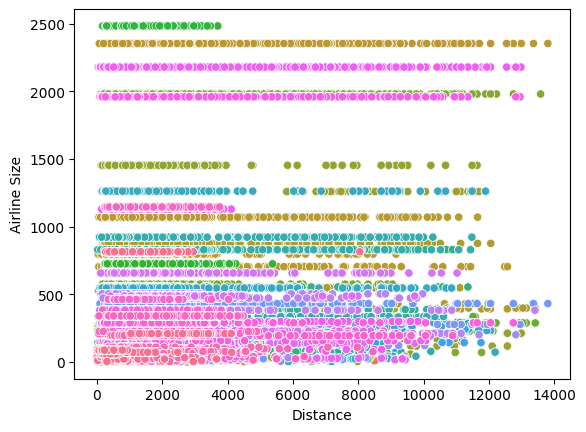

In [ ]:
sns.scatterplot(routes_merged,x=routes_merged['Distance'],y=routes_merged['Airline Size'],hue=routes_merged['Airline'],legend=False)